In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pseudopy import *
from matplotlib import pyplot
from scipy.linalg import eigvals
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

In [2]:
A = np.matrix([[2,  0, 1],
               [3, -1, 1],
               [-2,  4, 1],
               [1,  1, 1]]);A

matrix([[ 2,  0,  1],
        [ 3, -1,  1],
        [-2,  4,  1],
        [ 1,  1,  1]])

In [3]:
d = A.T@A

In [4]:
Λ,X = np.linalg.eig(d)

In [5]:
D = np.diag(np.round(Λ));D

array([[28.,  0.,  0.],
       [ 0., 12.,  0.],
       [ 0.,  0., -0.]])

In [6]:
np.round(X,3)

array([[-0.707,  0.577, -0.408],
       [ 0.707,  0.577, -0.408],
       [ 0.   ,  0.577,  0.816]])

In [7]:
U,S,V = np.linalg.svd(A,full_matrices=False)
S = np.diag(S)
S

array([[5.29150262e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.46410162e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 5.72212401e-16]])

In [8]:
U

matrix([[-2.67261242e-01,  5.00000000e-01, -8.04910061e-01],
        [-5.34522484e-01,  5.00000000e-01,  5.69500183e-01],
        [ 8.01783726e-01,  5.00000000e-01,  1.11363435e-01],
        [ 2.49800181e-16,  5.00000000e-01,  1.24046443e-01]])

In [9]:
V

matrix([[-7.07106781e-01,  7.07106781e-01,  2.10475052e-16],
        [ 5.77350269e-01,  5.77350269e-01,  5.77350269e-01],
        [ 4.08248290e-01,  4.08248290e-01, -8.16496581e-01]])

In [10]:
np.round(U@S@V.T,2)

array([[ 2.22,  0.18,  0.13],
       [ 3.22, -0.63, -0.45],
       [-1.78,  3.45,  2.44],
       [ 1.22,  1.  ,  0.71]])

In [36]:
x = np.array([9,10,2,7,1,3,4,6,8,5]);x
x = np.asmatrix(x)
U,S,V = np.linalg.svd(x)

In [37]:
B = np.matrix([[ 6, 6],
               [-1, 1]]);B

matrix([[ 6,  6],
        [-1,  1]])

In [38]:
U,S,V = np.linalg.svd(B,full_matrices=False)
S = np.diag(S)
np.round(U@S@V.T,2)

array([[ 6.,  6.],
       [-1.,  1.]])

In [ ]:
np.linalg.eig(B)

In [39]:
def Gerschgorin(A):

    n = len(A)
    eval, evec = np.linalg.eig(A)

    patches = []
    
    # draw discs
    
    for i in range(n):
        xi = np.real(A[i,i])
        yi = np.imag(A[i,i])
        ri = np.sum(np.abs(A[i,:])) - np.abs(A[i,i]) 
        
        circle = Circle((xi, yi), ri)
        patches.append(circle)

    fig, ax = plt.subplots()

    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.1)
    ax.add_collection(p)
    plt.axis('equal')
    
    for xi, yi in zip(np.real(eval), np.imag(eval)):
        plt.plot(xi, yi,'o')
    
    plt.show()

In [40]:
np.random.seed(123)
n  = 6
mu = 0  
sigma = 1
A  = np.random.normal(mu, sigma, (n,n))
A  = np.asmatrix(A)
C = (A+A.conj().T)/2

In [41]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(C)

True

In [42]:
def randomhermitian(n):
    np.random.seed(123)
    mu = 0  
    sigma = n**(-1/2)
    A  = np.random.normal(mu, sigma, (n,n))* 1j
    A  = np.asmatrix(A);A
    C = (A+A.conj().T)/2
    return(C)

In [43]:
A = randomhermitian(4);A

matrix([[ 0.+0.j        ,  0.+0.39398642j,  0.-0.24573944j,
          0.-0.74942109j],
        [ 0.-0.39398642j,  0.+0.j        , -0.-0.38998471j,
          0.+0.05249734j],
        [ 0.+0.24573944j,  0.+0.38998471j,  0.+0.j        ,
          0.+0.08731825j],
        [ 0.+0.74942109j, -0.-0.05249734j, -0.-0.08731825j,
          0.+0.j        ]])

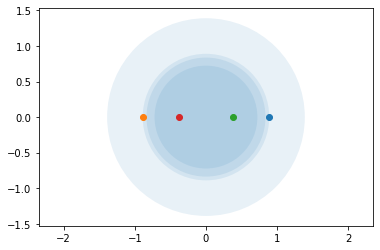

In [44]:
Gerschgorin(A)

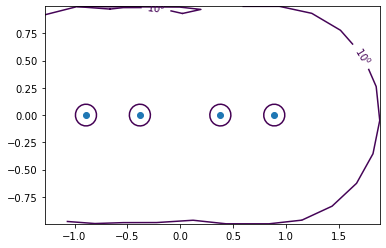

In [45]:
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()

In [46]:
U,S,V = np.linalg.svd(B,full_matrices=False)

In [47]:
from scipy.linalg import svdvals
def inv_resolvent_norm(A, z, method='svd'):
    
    if method == 'svd':
        return np.min(svdvals(A - z*np.eye(*A.shape)))
    elif method == 'lanczos':
        m, n = A.shape
        if m > n:
            raise ValueError('m > n is not allowed')
        AH = A.T.conj()

        def matvec(x):
            
            x1 = x[:m]
            x2 = x[m:]
            ret1 = AH.dot(x2) - np.conj(z)*x2
            ret2 = np.array(A.dot(x1), dtype=np.complex)
            ret2[:n] -= z*x1
            return np.c_[ret1, ret2]
        AH_A = LinearOperator(matvec=matvec, dtype=np.complex,
                              shape=(m+n, m+n))

        evals = eigsh(AH_A, k=2, tol=1e-6, which='SM', maxiter=m+n+1,
                      ncv=2*(m+n),
                      return_eigenvectors=False)

        return np.min(np.abs(evals))

In [48]:
A = np.matrix([[-1,1,0],
               [0,-1,1],
               [4,-8,4]])
A

matrix([[-1,  1,  0],
        [ 0, -1,  1],
        [ 4, -8,  4]])

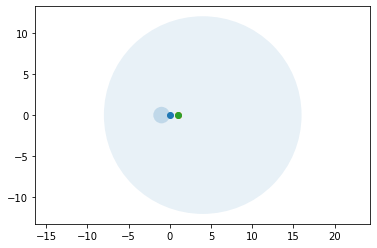

In [49]:
Gerschgorin(A)

In [50]:
inv_resolvent_norm(A, z=1j, method='svd')

0.14073330835911999

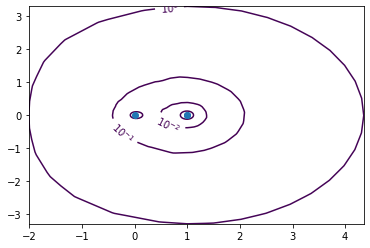

In [51]:
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()

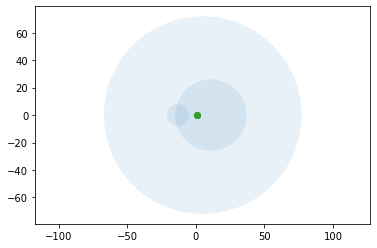

In [52]:
A = np.matrix([[-13,-2,6],
               [52,5,-20],
               [-22,-4,11]])
A
Gerschgorin(A)

In [53]:
inv_resolvent_norm(A, z=1j, method='svd')

0.014880045695576412

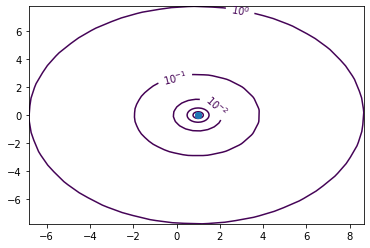

In [54]:
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()

In [55]:
def rsvd(A, Omega):
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

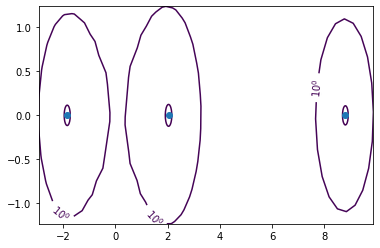

In [65]:
np.random.seed(1000)
A = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])
rank = 2
Omega = np.random.randn(A.shape[1], rank)
Omega
pseudo = NonnormalAuto(A, 1e-5, 1)
pseudo.plot([10**k for k in range(-4, 3)], spectrum=eigvals(A))
pyplot.show()


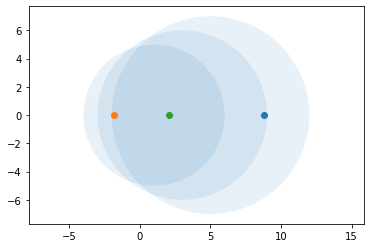

In [57]:
Gerschgorin(A)

In [58]:
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.38070859  0.60505354]
 [ 0.56830191 -0.74963644]
 [ 0.72944767  0.26824507]]

Singular values:
[9.34224023 3.02039888]

Right singular vectors:
[[ 0.57915029  0.61707064  0.53273704]
 [-0.77420021  0.21163814  0.59650929]]



In [59]:
def power_iteration(A, Omega, power_iter = 3):
    Y = A @ Omega
    for q in range(power_iter):
        Y = A @ (A.T @ Y)
    Q, _ = np.linalg.qr(Y)
    return Q
def rsvd(A, Omega):
    Q = power_iteration(A, Omega)
    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde
    return u, s, v

In [60]:
np.random.seed(1000)
a = np.array([[1, 3, 2],
              [5, 3, 1],
              [3, 4, 5]])

np.linalg.cond(a)

8.582993689370598

In [61]:
U,S,V = np.linalg.svd(a,full_matrices=False)
np.max(S)/np.min(S)

8.582993689370602

In [62]:
rank = 2
Omega = np.random.randn(A.shape[1], rank)
u, s, v = rsvd(A, Omega)
print('Left singular vectors:')
print(u)
print()
print('Singular values:')
print(s)
print()
print('Right singular vectors:')
print(v)
print()

Left singular vectors:
[[ 0.37421757  0.28528579]
 [ 0.56470638 -0.82484381]
 [ 0.73557319  0.48810317]]

Singular values:
[9.34265841 3.24497775]

Right singular vectors:
[[ 0.57847229  0.61642675  0.53421706]
 [-0.73178429  0.10284774  0.67373147]]



In [63]:
power_iteration(A, Omega, power_iter = 3)

array([[-0.37411363,  0.28542208],
       [-0.56500678, -0.82463807],
       [-0.73539536,  0.48837106]])